In [1]:
# ARMA - 
# ARIMA - 
# SARIMA - 

In [2]:
pip install pandas-datareader

In [34]:
# Datareader is suitable for real time stocks tracking, US government bonds and other as well.
# Datetime is suitable for work with date formats.
# Pandas, seaborn and matplotlib are basic liibrares.

In [33]:
import pandas_datareader.data as web
import pandas_datareader as pdr
# pdr.get_data_fred('GS10')

import datetime

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#

In [19]:
UBS_Close = pd.read_csv("UBS_volume_d.csv")
print(UBS_Close.head())

         Date   Open   High    Low  Close      Volume
0  03/22/2022  17.61  17.99  17.59  17.84  11,000,140
1  03/21/2022  17.28  17.53  17.27  17.45   9,100,878
2  03/18/2022  17.06  17.27  16.99  17.22  27,132,990
3  03/17/2022  16.88  17.24  16.79  17.08  17,638,020
4  03/16/2022  16.45  17.08  16.35  17.03  16,070,460


In [20]:
UBS_Close.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

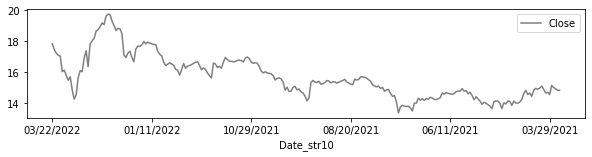

In [22]:
# Convert Date in nanoseconds to simple 10 values string
UBS_Close['Date_str'] = UBS_Close['Date'].astype(str)
UBS_Close['Date_str10'] = UBS_Close['Date_str'].str[:10]
UBS_Close.plot(figsize=(10,2),x='Date_str10', y='Close',color="tab:grey", label='Close')

In [ ]:
# convert the string to datetime

In [24]:
UBS_Close['Date_dt'] =pd.to_datetime(UBS_Close.Date_str10)

In [29]:
# revise the changed date formats

In [106]:
UBS_Close.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Date_str              object
Date_str10            object
Date_dt       datetime64[ns]
forecast             float64
dtype: object

In [61]:
print(UBS_Close.head())

                  Date   Open   High    Low  Close      Volume    Date_str  \
Date_dt                                                                      
2022-03-22  03/22/2022  17.61  17.99  17.59  17.84  11,000,140  03/22/2022   
2022-03-21  03/21/2022  17.28  17.53  17.27  17.45   9,100,878  03/21/2022   
2022-03-18  03/18/2022  17.06  17.27  16.99  17.22  27,132,990  03/18/2022   
2022-03-17  03/17/2022  16.88  17.24  16.79  17.08  17,638,020  03/17/2022   
2022-03-16  03/16/2022  16.45  17.08  16.35  17.03  16,070,460  03/16/2022   

            Date_str10    Date_dt  
Date_dt                            
2022-03-22  03/22/2022 2022-03-22  
2022-03-21  03/21/2022 2022-03-21  
2022-03-18  03/18/2022 2022-03-18  
2022-03-17  03/17/2022 2022-03-17  
2022-03-16  03/16/2022 2022-03-16  


In [ ]:
# set up the new index for plt and print the graph

In [62]:
UBS_Close.index = pd.to_datetime(UBS_Close['Date_dt'], format='%Y-%m-%d')

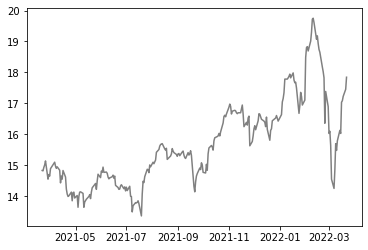

In [63]:
plt.plot(UBS_Close.index, UBS_Close['Close'],color='grey')

In [ ]:
#

In [145]:
train = UBS_Close[UBS_Close.index < pd.to_datetime("2022-01-01", format='%Y-%m-%d')]
test = UBS_Close[UBS_Close.index > pd.to_datetime("2022-01-01", format='%Y-%m-%d')]

In [146]:
len( train )

199

In [147]:
len( test )

57

In [ ]:
#

In [91]:
from statsmodels import tsa
import statsmodels.api as sm
from scipy import stats

In [76]:
# from statsmodels.tsa.arima_model import ARIMA

In [79]:
# from statsmodels.tsa.arima_model import ARMA

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [96]:
import statsmodels.api as sm

In [97]:
model=sm.tsa.statespace.SARIMAX(UBS_Close['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [99]:
results=model.fit()

In [100]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  256
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -62.009
Date:                            Fri, 15 Apr 2022   AIC                            134.018
Time:                                    09:30:12   BIC                            151.483
Sample:                                         0   HQIC                           141.053
                                            - 256                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9582      0.065     14.751      0.000       0.831       1.085
ma.L1         -0.9964      0.312     -3.191      0.001      -1.608      -0.384
ar.S.L12      -0.1594      0.063     -2.539      0.011      -0.282      -0.036
ma.S.L12      -0.9997     27.968     -0.036      0.971     -55.817      53.818
sigma2         0.0815      2.270      0.036      0.971      -4.368       4.531
===================================================================================
Ljung-Box (Q):                       38.86   Jarque-Bera (JB):               182.10
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
UBS_Close.count()

Date          256
Open          256
High          256
Low           256
Close         256
Volume        256
Date_str      256
Date_str10    256
Date_dt       256
forecast       51
dtype: int64

In [148]:
results.predict(start=199,end=199+57-1,dynamic=True)

Date_dt
2021-06-14    14.695365
2021-06-11    14.583516
2021-06-10    14.617033
2021-06-09    14.676899
2021-06-08    14.577756
2021-06-07    14.505204
2021-06-04    14.551797
2021-06-03    14.584800
2021-06-02    14.535966
2021-06-01    14.486647
2021-05-31    14.347853
2021-05-28    14.247073
2021-05-27    14.254627
2021-05-26    14.186467
2021-05-25    14.209998
2021-05-21    14.285760
2021-05-20    14.200563
2021-05-19    14.127965
2021-05-18    14.169685
2021-05-17    14.210966
2021-05-14    14.184884
2021-05-12    14.194898
2021-05-11    14.070567
2021-05-10    14.005143
2021-05-07    14.018746
2021-05-06    13.946698
2021-05-05    13.974767
2021-05-04    14.050819
2021-05-03    13.966104
2021-04-30    13.896106
2021-04-29    13.941087
2021-04-28    13.983428
2021-04-27    13.955999
2021-04-26    13.958741
2021-04-23    13.834197
2021-04-22    13.765144
2021-04-21    13.779705
2021-04-20    13.710117
2021-04-19    13.739228
2021-04-16    13.816925
2021-04-15    13.733753
2021-04-

In [153]:
UBS_Close.drop('forecast', inplace=True, axis=1)

In [156]:
UBS_Close['forecast']=results.predict(start=199,end=199+57-1,dynamic=True)

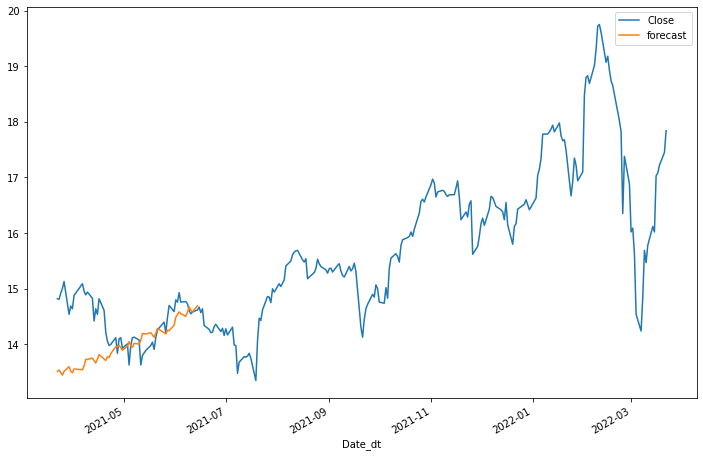

In [157]:
UBS_Close[['Close','forecast']].plot(figsize=(12,8))

In [ ]:
#

In [ ]:
#